# Counting
In this notebook we will study some important features about Star Wars movies based on counting the number of nodes and relationships between them. We will analyse:
- Which characters have the most appearences in all the movies
- Which movie has the most characters / edges
- Which node has the most edges

In [1]:
# Impotts
from neo4j import GraphDatabase, basic_auth
import pandas as pd
from drawGraph import drawGraph

In [2]:
# DB connection
uri = "bolt://localhost:7687"
user = "neo4j"
password = "neo4j"

driver = GraphDatabase.driver(uri, auth=basic_auth(user, password))
session = driver.session(database="neo4j")

## Which characters have the most appearences in all the movies

In [3]:
most_appear = '''
    MATCH p=(n)-[:APPEARS_IN]->()
    WHERE n:Person OR n:Droid
    RETURN n.name AS Name, count(RELATIONSHIPS(p)) AS Appearances
    ORDER BY Appearances DESC, Name
'''
results = session.read_transaction(
        lambda tx: tx.run(most_appear).data())
df = pd.DataFrame(results)
df

,Name,Appearances
0,C-3PO,7
1,R2-D2,7
2,OBI-WAN,6
3,EMPEROR,5
4,YODA,5
...,...,...
107,UNKAR PLUTT,1
108,VALORUM,1
109,WALD,1
110,YOLO ZIFF,1


As we can see, C-3PO and R2-D2 are the only characters that appear in every movie.

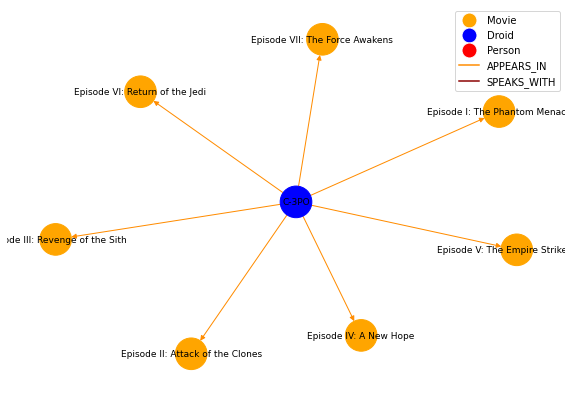

In [4]:
most_appear = '''
    MATCH p=(ch)-[:APPEARS_IN]->()
    WHERE ch.name='C-3PO'
    RETURN p
'''
drawGraph(driver, most_appear, node_size=1000, width=10, height=7, font_size=9)

## Which movie has the most characters/edges

In [5]:
most_char = '''
    MATCH p=()--(m:Movie)
    RETURN m.name AS Title, count(p) AS NumberOfCharacters
    ORDER BY NumberOfCharacters DESC, Title
'''
results = session.read_transaction(
        lambda tx: tx.run(most_char).data())
df = pd.DataFrame(results)
df

,Title,NumberOfCharacters
0,Episode I: The Phantom Menace,38
1,Episode II: Attack of the Clones,33
2,Episode VII: The Force Awakens,27
3,Episode III: Revenge of the Sith,25
4,Episode IV: A New Hope,22
5,Episode V: The Empire Strikes Back,21
6,Episode VI: Return of the Jedi,20


The movie with most edges is 'Episode I: The Phantom Menace'.

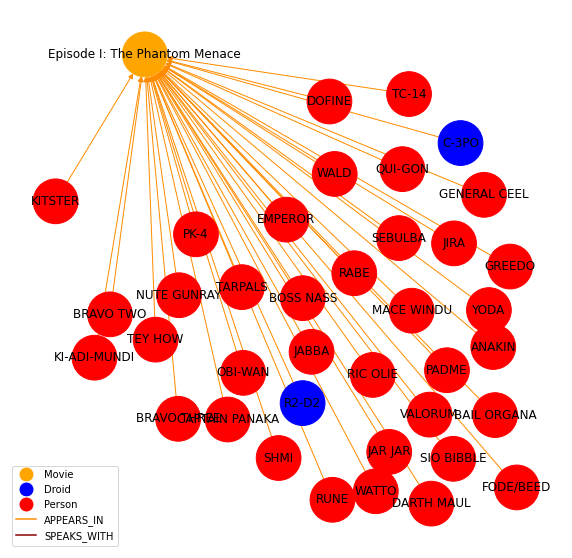

In [10]:
most_char = '''
    MATCH p=()--(m:Movie)
    WHERE m.name='Episode I: The Phantom Menace'
    RETURN p
'''
drawGraph(driver, most_char, width=10, height=10)

## Which node has the most edges

In [7]:
most_edges = '''
    MATCH p=(n)--()
    RETURN n.name AS Name, count(RELATIONSHIPS(p)) AS NumberOfEdges
    ORDER BY NumberOfEdges DESC, Name
'''
results = session.read_transaction(
        lambda tx: tx.run(most_edges).data())
df = pd.DataFrame(results)
df

,Name,NumberOfEdges
0,ANAKIN,46
1,C-3PO,43
2,OBI-WAN,43
3,Episode I: The Phantom Menace,38
4,PADME,37
...,...,...
114,JANSON,2
115,JERJERROD,2
116,TARPALS,2
117,TION MEDON,2


The node with most edges turns out to be the character named Anakin. We will see which of the nodes are characters and which are movies.

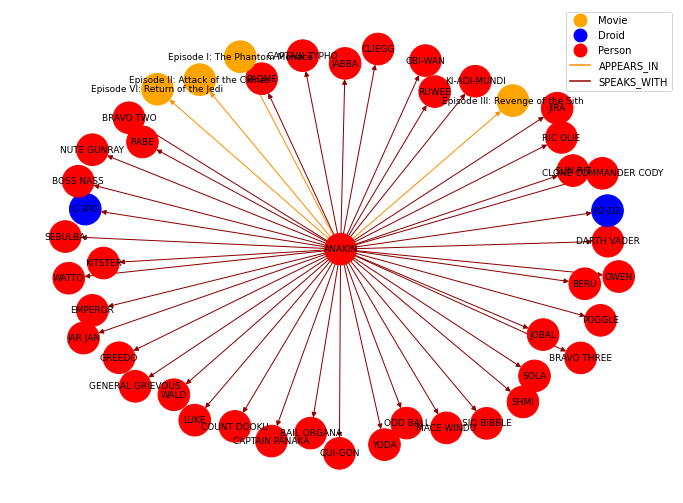

In [8]:
most_edges = '''
    MATCH p=(n)--()
    WHERE n.name='ANAKIN'
    RETURN p
'''
drawGraph(driver, most_edges, height=9, node_size=1000, font_size=9)

As it's shown, this character has appeared in 4 of the movies and has spoken with 42 characters.

In [9]:
# Close all connections
driver.close()
session.close()
drive = None
session = None